# Case Study: Luxembourg during German occupation (1940-1944)

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

In [6]:
data_path = "data/"
output_path = "data/"

## Import Data

In [3]:
mentions_fr = pd.read_pickle(data_path + "mentions_fr.pkl")
mentions_de = pd.read_pickle(data_path + 'mentions_de.pkl')
mentions_all = pd.concat([mentions_fr, mentions_de])

articles_fr = pd.read_pickle(data_path + "articles_fr.pkl")
articles_de = pd.read_pickle(data_path + 'articles_de.pkl')
articles = pd.concat([articles_fr, articles_de])

In [4]:
#divide by country
mentions_ch = mentions_all[mentions_all['country'] == 'CH']
mentions_lu = mentions_all[mentions_all['country'] == 'LU']

articles_ch = articles[articles['country'] == 'CH']
articles_lu = articles[articles['country'] == 'LU']

In [7]:
#specify decades
decades = sorted(articles['decade'].unique())
relevant_decs = list(range(1840, 2010, 10))

## Functions

In [8]:
#specifying colors for agencies
agencies = sorted(mentions_all['agency'].unique())
colors = plt.cm.tab20
clist = [colors(i) for i in range(colors.N)]
custom_cmap = dict(zip(agencies, clist[:len(agencies)]))

def plot_ag_by_time_lang(orig_df, country, time_level="decade", intervals = relevant_decs):

    df = orig_df[orig_df['country'] == country]
    if country == "CH":
        full_country = "Switzerland"
    elif country == "LU":
        full_country = "Luxembourg"
    else:
        raise NameError("Use CH or LU for country")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), sharex=True)
    #French
    na_per_decade_fr = pd.pivot_table(df[(df['language'] == "fr") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_fr.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - FR: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax1)

    #German
    na_per_decade_de = pd.pivot_table(df[(df['language'] == "de") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_de.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - DE: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax2)

    #Plot
    fig.tight_layout(pad=4.0)
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1,0.5), loc="center left")
    ax1.xaxis.set_tick_params(labelbottom=True, rotation=90)
    plt.show()

## Luxembourg

### 1930s & 1940s

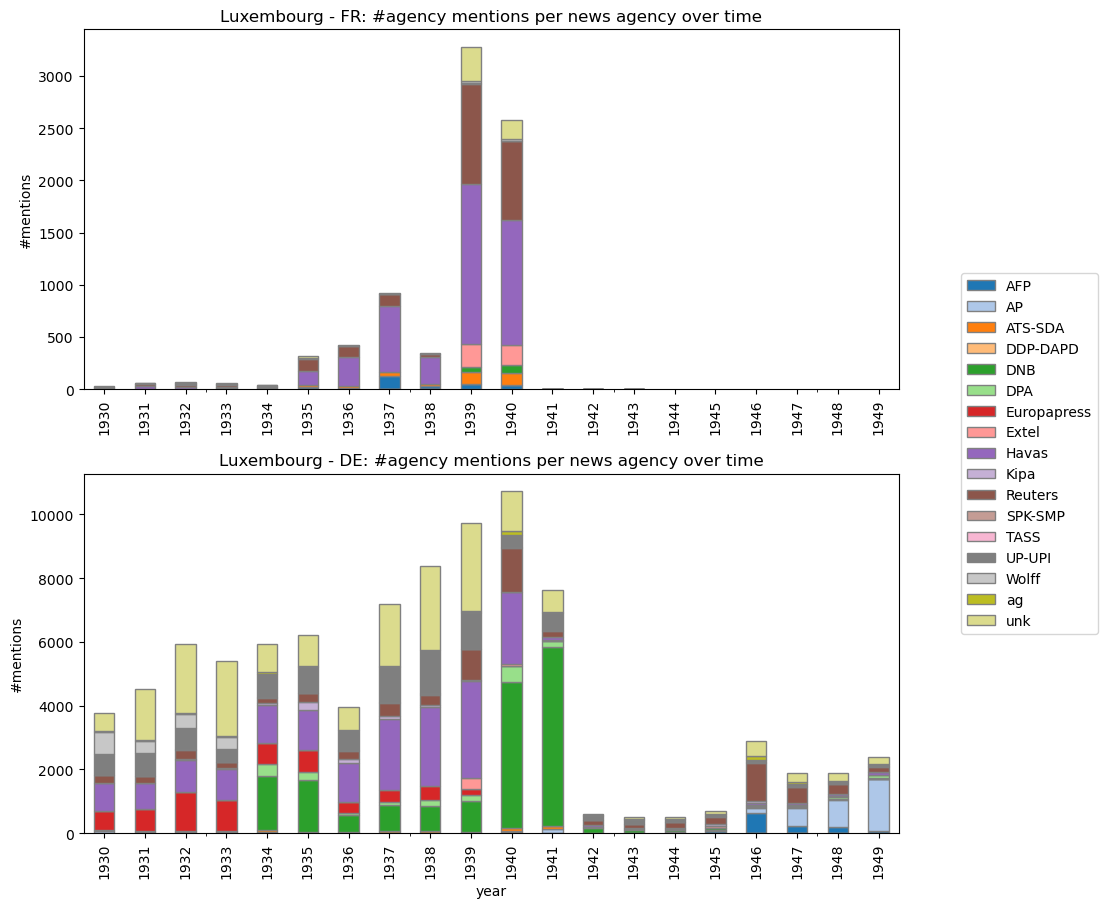

In [10]:
plot_ag_by_time_lang(mentions_lu, "LU", time_level="year", intervals=list(range(1930, 1950, 1)))

### 1940 by month

In [15]:
mentions_lu_1940 = mentions_lu[mentions_lu['year'] == 1940]
mentions_lu_1940['month'] = mentions_lu_1940['date'].apply(lambda x: int(x.split("-")[1]))
mentions_lu_1940.head()

/tmp/ipykernel_3890980/1726002962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentions_lu_1940['month'] = mentions_lu_1940['date'].apply(lambda x: int(x.split("-")[1]))


,entity,surface,qid,lSentenceOffset,rSentenceOffset,sentence_idx:,lArticleOffset,rArticleOffset,id,article,newspaper,date,year,decade,agency,language,country,month
1266,org.ent.pressagency.Extel,Belga,Q1525848,3,8,1,38,43,luxembourg1935-1940-04-13-a-i0024:1:3:8:38:43:...,luxembourg1935-1940-04-13-a-i0024,luxembourg1935,1940-04-13,1940,1940,Extel,fr,LU,4
6182,org.ent.pressagency.Havas,Havas,Q2826560,2,7,1,60,65,luxembourg1935-1940-05-01-a-i0022:1:2:7:60:65:...,luxembourg1935-1940-05-01-a-i0022,luxembourg1935,1940-05-01,1940,1940,Havas,fr,LU,5
7468,org.ent.pressagency.Reuters,Reuter,Q130879,3,9,1,191,197,luxembourg1935-1940-03-30-a-i0018:1:3:9:191:19...,luxembourg1935-1940-03-30-a-i0018,luxembourg1935,1940-03-30,1940,1940,Reuters,fr,LU,3
8684,org.ent.pressagency.unk,. N. B.,NIL,-1,6,1,31,38,luxembourg1935-1940-02-09-a-i0012:1:-1:6:31:38...,luxembourg1935-1940-02-09-a-i0012,luxembourg1935,1940-02-09,1940,1940,unk,fr,LU,2
10068,org.ent.pressagency.Havas,Havas,Q2826560,3,8,1,38,43,luxembourg1935-1940-03-01-a-i0022:1:3:8:38:43:...,luxembourg1935-1940-03-01-a-i0022,luxembourg1935,1940-03-01,1940,1940,Havas,fr,LU,3


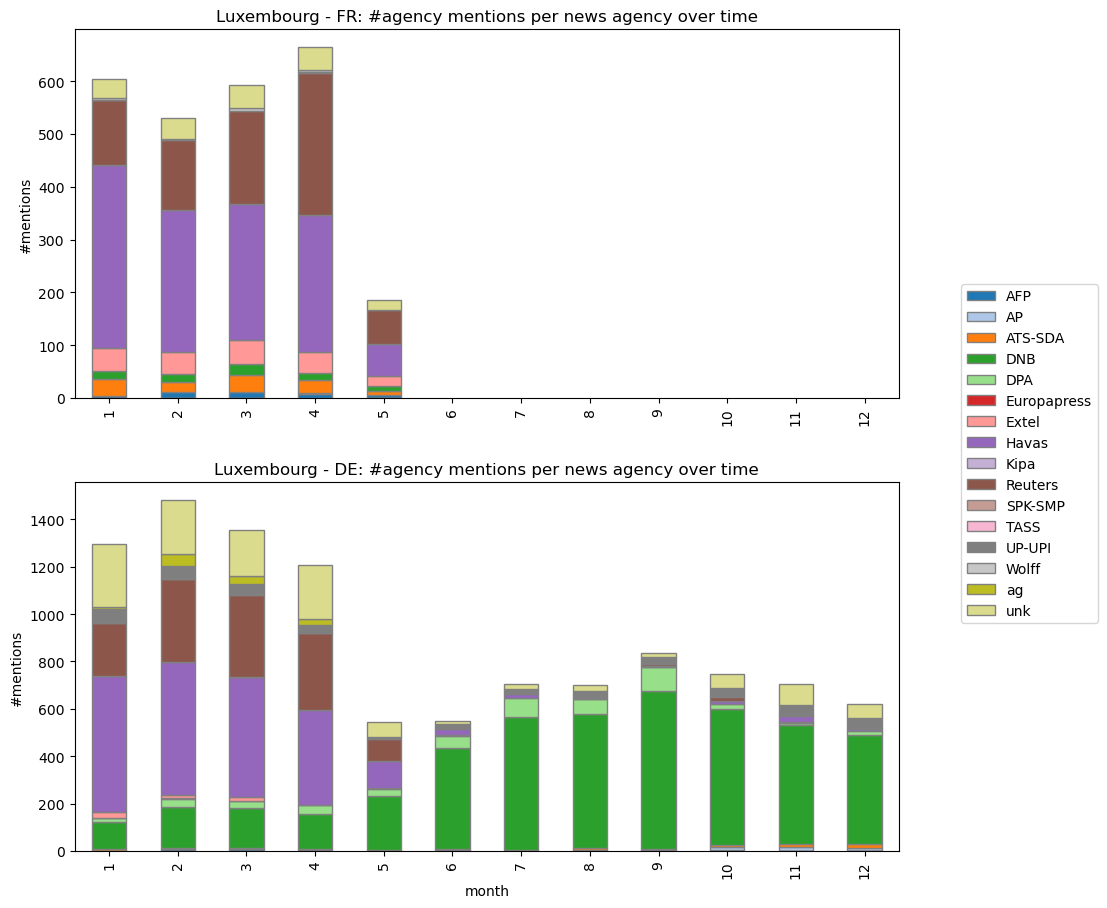

In [18]:
#invasion 10th May
plot_ag_by_time_lang(mentions_lu_1940, "LU", time_level="month", intervals=list(range(1, 13, 1)))

## Switzerland (for Comparison)

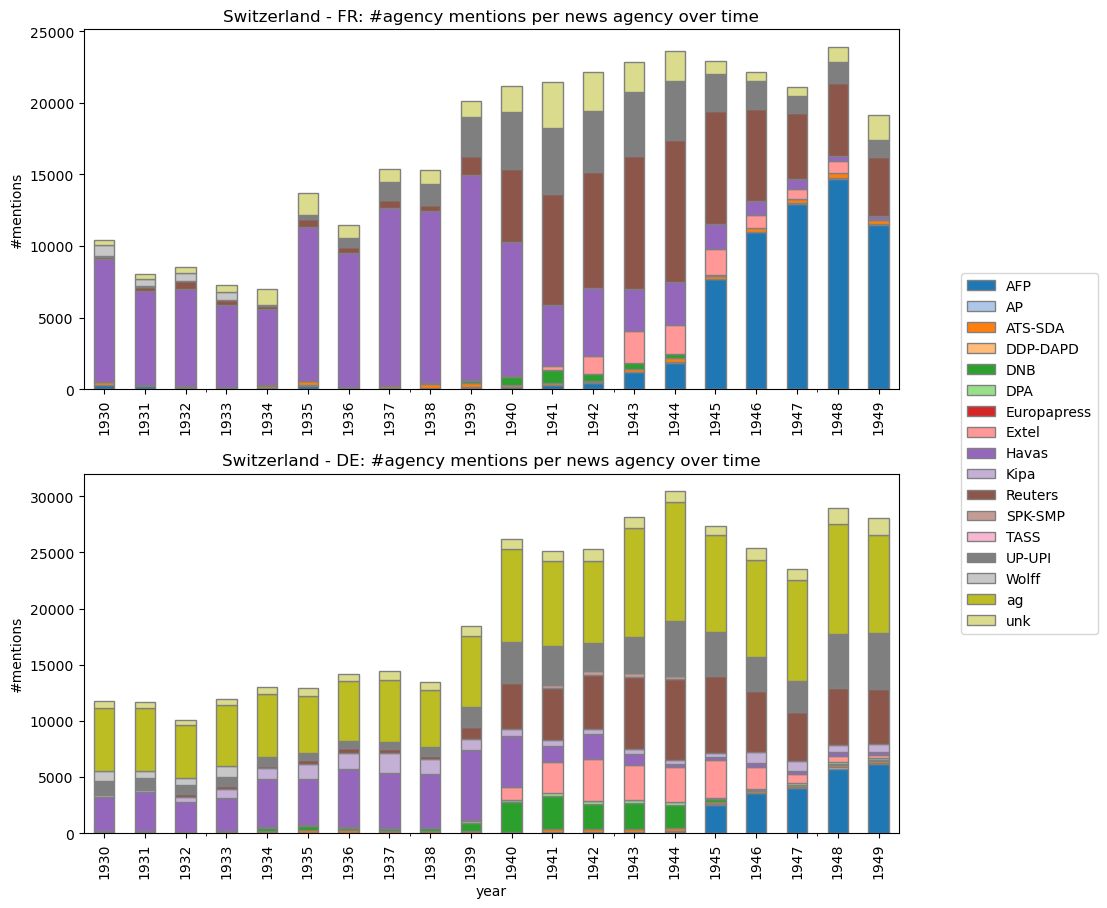

In [9]:
plot_ag_by_time_lang(mentions_ch, "CH", time_level="year", intervals=list(range(1930, 1950, 1)))

## Havas & Extel

- Extel: in all newspapers?
- Havas: all false positives? idea: Havas-OFI?